In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing dataset
car_df = pd.read_csv('cars.csv')

In [3]:
car_df.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
'''
**Dataset columns info**
Variable Role	    Type	       Description	                                           Units	Missing Values
buying	 Feature	Categorical	   buying price		                                                no
maint	 Feature	Categorical	   price of the maintenance		                                    no
doors	 Feature	Categorical	   number of doors		                                            no
persons	 Feature	Categorical	   capacity in terms of persons to carry		                    no
lug_boot Feature	Categorical	   the size of luggage boot		                                    no
safety	 Feature	Categorical	   estimated safety of the car		                                no
class	 Target	    Categorical	   evaluation level (unacceptable, acceptable, good, very good)		no
'''

car_df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [6]:
#Visualizing the dataset using label encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [7]:
#correlation analysis using lable encoder

#encoding categorical variables to numeric values
encoded_df = car_df.apply(label_encoder.fit_transform)


In [8]:
#compute correlation matrix
corr_matrix = encoded_df.corr()

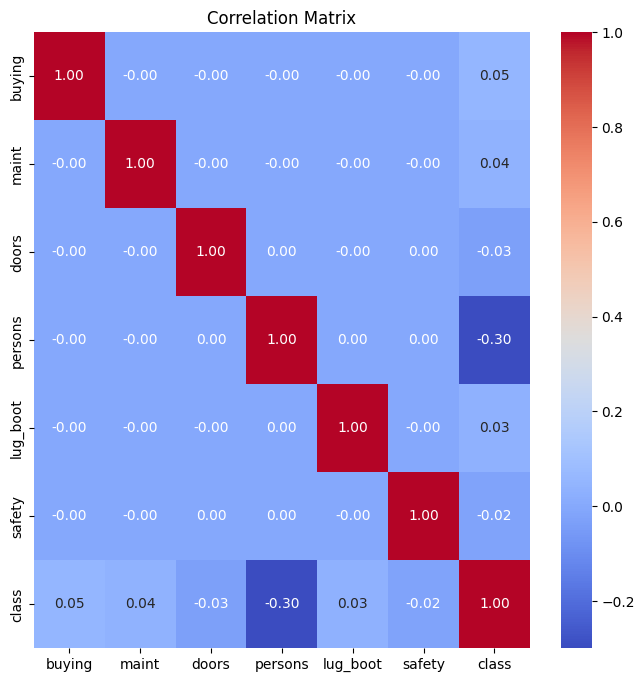

In [9]:
#plotting the correlation matrix

plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

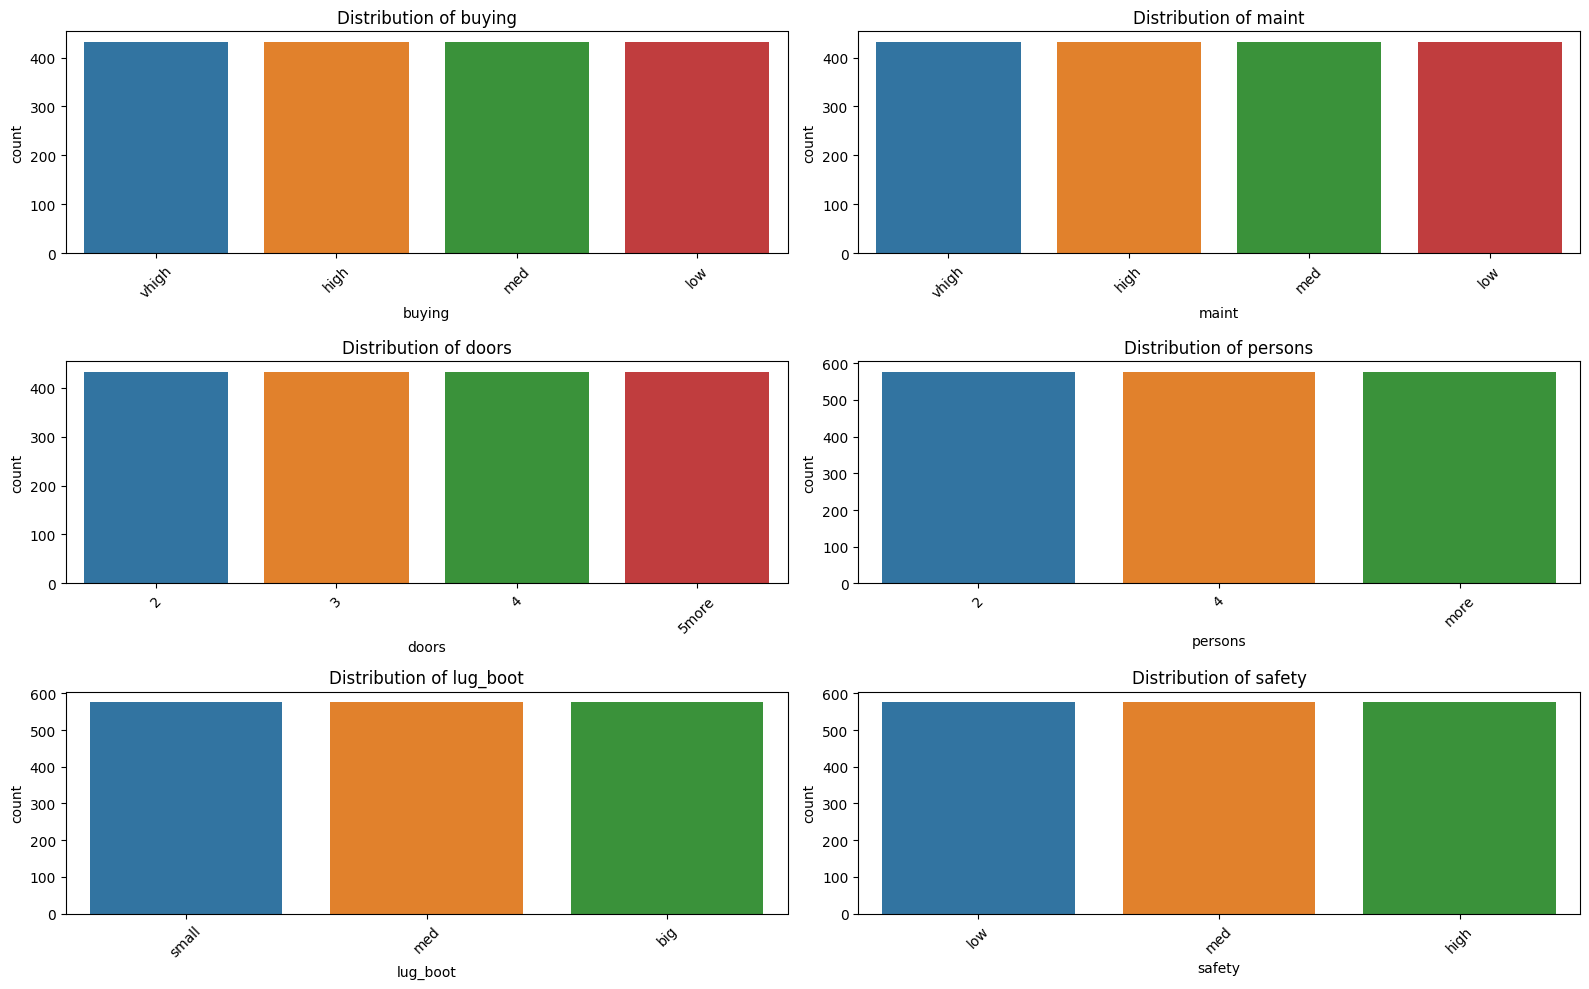

In [10]:
#feature distribution
categorical_columns = car_df.columns[:-1]

#plot the distribution for each categorical feature
plt.figure(figsize=(16, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=car_df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

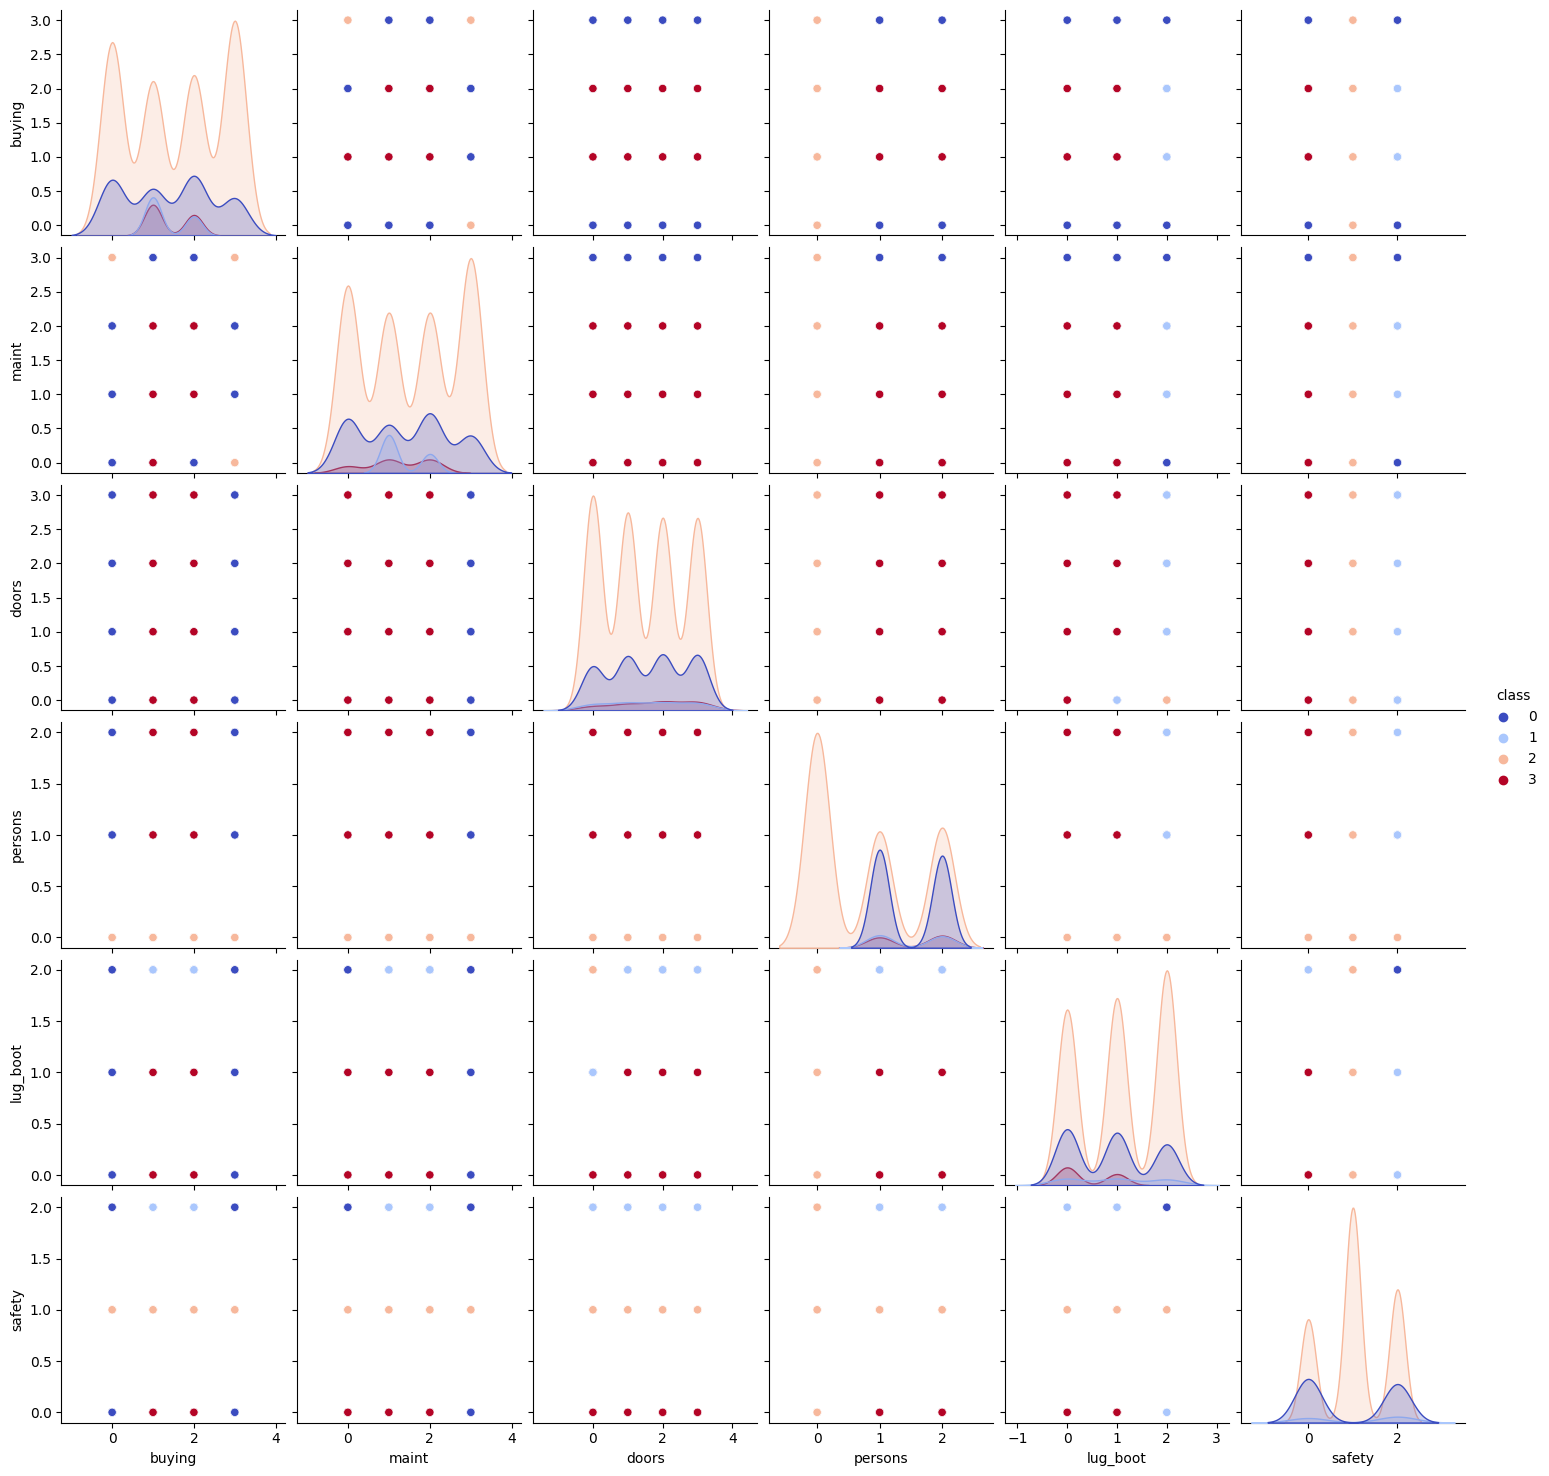

In [11]:
#pair-wise relationship using lable encoder data
plt.figure(figsize=(10, 10))
sns.pairplot(data=encoded_df, hue='class', palette='coolwarm')
plt.show()

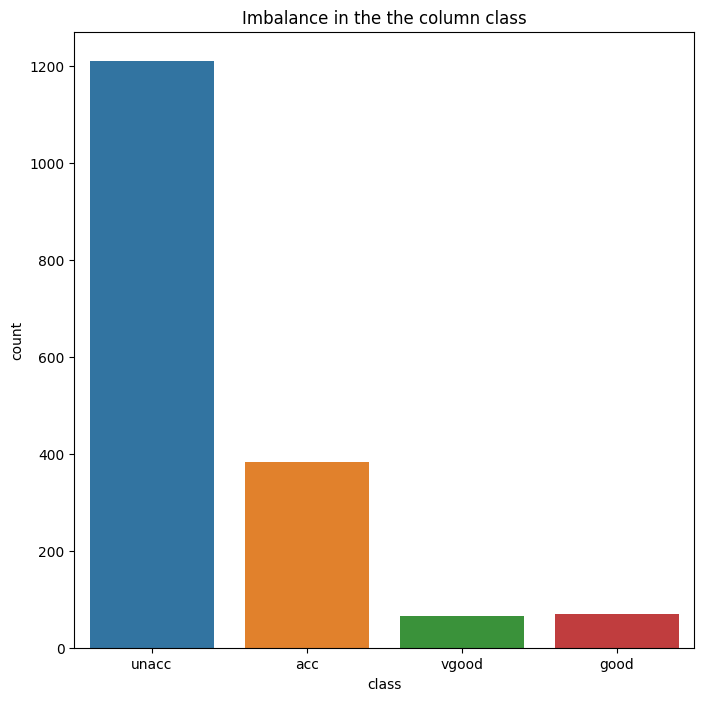

In [13]:
#class balance analysis
plt.figure(figsize=(8,8))
sns.countplot(data=car_df, x='class')
plt.title("Imbalance in the the column class")
plt.show()

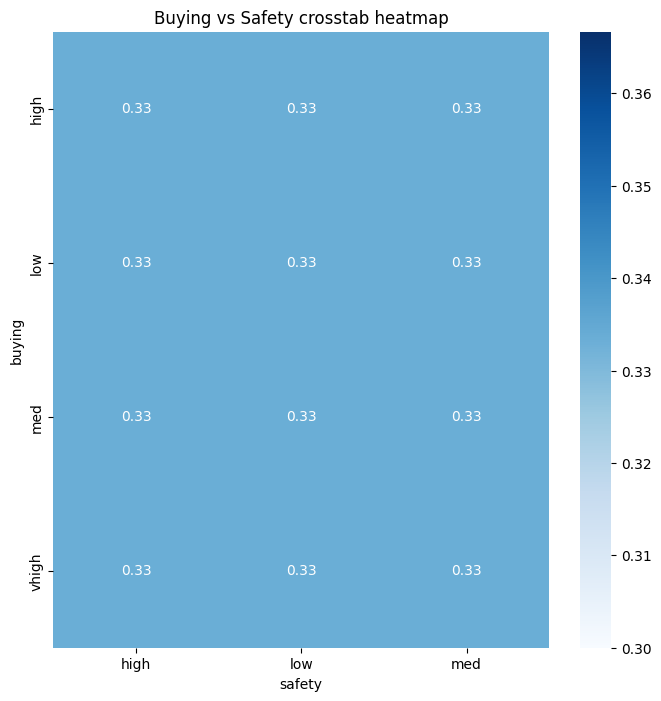

In [16]:
#feature interaction
#heatmap of cross tab between the columns 'buying' and 'safety' for the target variable

interaction_crosstab = pd.crosstab(car_df['buying'], car_df['safety'], normalize='index')
plt.figure(figsize=(8,8))
sns.heatmap(interaction_crosstab, annot=True, fmt='.2f', cmap='Blues')
plt.title('Buying vs Safety crosstab heatmap')
plt.show()

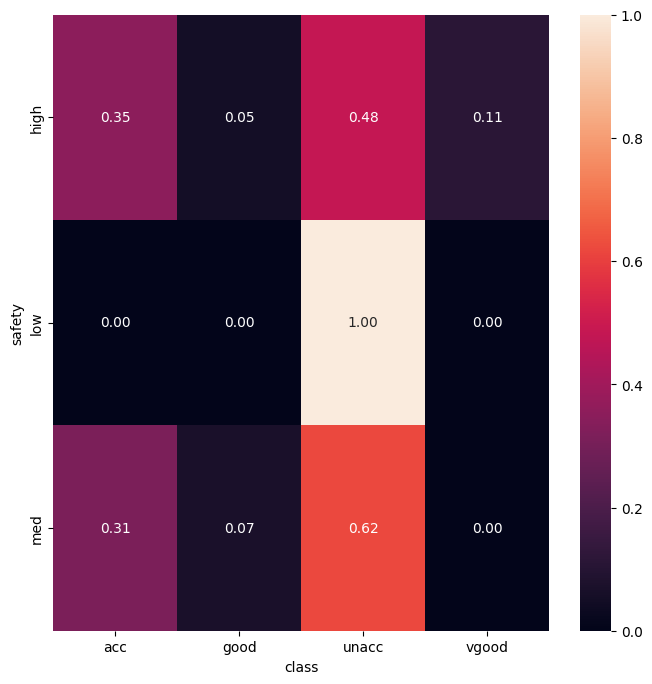

In [18]:
i2 = pd.crosstab(car_df['safety'], car_df['class'], normalize='index')
plt.figure(figsize=(8,8))
sns.heatmap(i2, annot=True, fmt='.2f')
plt.show()

In [ ]:
#Chi-squared test for association
#chi-sqared test between categorical features and the target variable
from scipy.stats import chi2_contingency

for col in categorical_columns:
    contingency_table = pd.crosstab(car_df[col], car_df['class'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"Chi-squared test between '{col}' and 'class' -> p-value: {p:.4f}, chi2: {chi2:.4f}, dof:{dof}")


Chi-squared test between 'buying' and 'class'-> p-value: 0.0000, chi2: 189.2430, dof:9
Chi-squared test between 'maint' and 'class'-> p-value: 0.0000, chi2: 142.9405, dof:9
Chi-squared test between 'doors' and 'class'-> p-value: 0.3202, chi2: 10.3848, dof:9
Chi-squared test between 'persons' and 'class'-> p-value: 0.0000, chi2: 371.3367, dof:6
Chi-squared test between 'lug_boot' and 'class'-> p-value: 0.0000, chi2: 53.2820, dof:6
Chi-squared test between 'safety' and 'class'-> p-value: 0.0000, chi2: 479.3224, dof:6


In [24]:
encoded_df = car_df.apply(LabelEncoder().fit_transform)

#random forest for feature importance
X = encoded_df.drop('class', axis=1,)
Y = encoded_df['class']


In [25]:
#Dimentionality reduction using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)


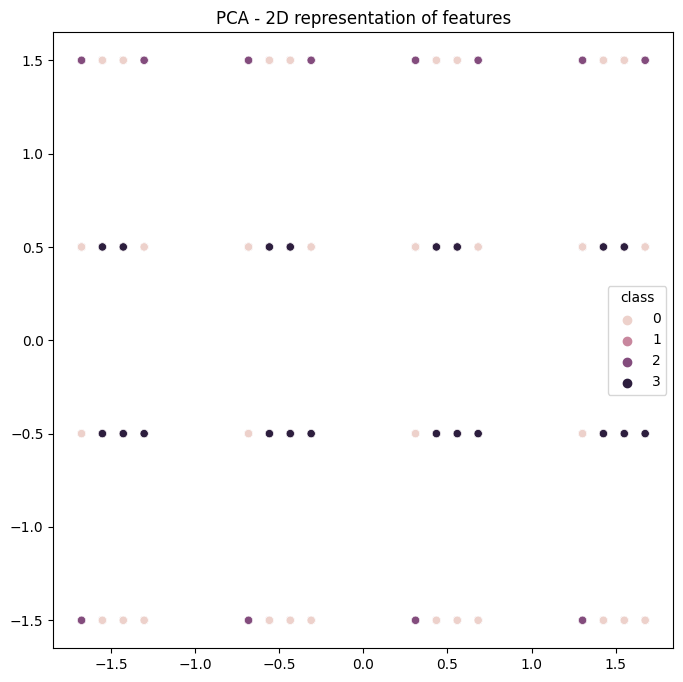

In [28]:
#scatterplot for 2D PCA
plt.figure(figsize=(8,8))
sns.scatterplot(y=X_pca[:, 0], x=X_pca[:, 1], hue=Y)
plt.title('PCA - 2D representation of features')
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(random_state=101)
randomForest.fit(X, Y)

RandomForestClassifier(random_state=101)

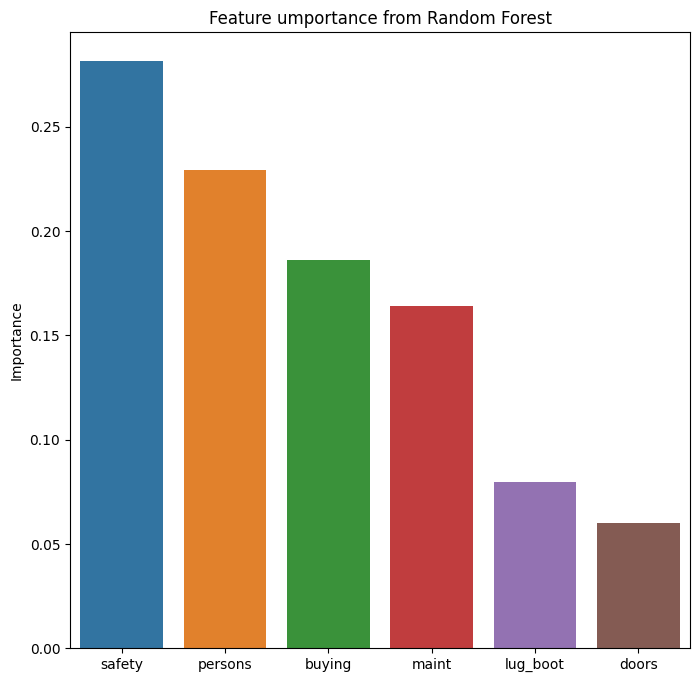

In [30]:
#plot features' importance

importances = randomForest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8,8))
sns.barplot(x=[categorical_columns[i] for i in indices], y=importances[indices])
plt.title('Feature umportance from Random Forest')
plt.ylabel('Importance')
plt.show()

In [36]:
#Model building 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

#model fitting
rf = RandomForestClassifier(random_state=121)
rf.fit(x_train, y_train)

#prediction
y_pred = rf.predict(x_test)

#preformance metrics of the model
cm = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f'Confusion Matrix: {cm}')




Accuracy: 0.9730250481695568
Precision: 0.9738736651185544
Confusion Matrix: [[104   2   2   0]
 [  3  18   0   0]
 [  5   2 367   0]
 [  0   0   0  16]]


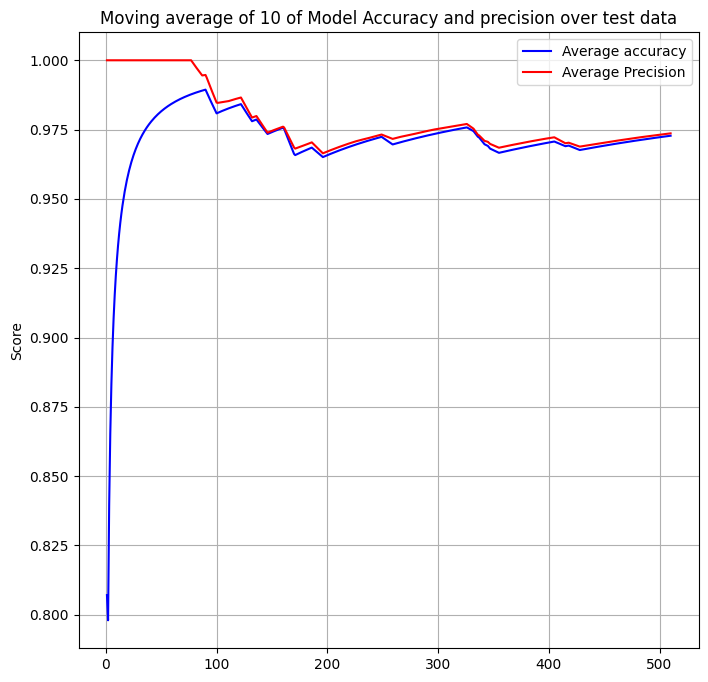

In [47]:
#calculate accuracy and precision of each point in the test dataset

accuracy_list = []
precision_list = []

for i in range(1, len(y_test)+1):
    accuracy_list.append(accuracy_score(y_test[:i], y_pred[:i]))
    precision_list.append(precision_score(y_test[:i], y_pred[:i], average='weighted', zero_division=0))


#function to compute moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

#calculating the moving average of accuracy and precision 
window_size = 10
smoothed_accuracy = moving_average(accuracy_list, window_size)
smoothed_precision = moving_average(precision_list, window_size)

#plotting
plt.figure(figsize=(8,8))
plt.plot(range(1,len(smoothed_accuracy)+1), smoothed_accuracy, label='Average accuracy', color='blue')
plt.plot(range(1,len(smoothed_precision)+1), smoothed_precision, label='Average Precision', color='red')
plt.title(f'Moving average of {window_size} of Model Accuracy and precision over test data')
plt.legend()
plt.grid()
plt.ylabel('Score')
plt.show()